### Importing Necessary Libraries

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### Loading Dataset

In [2]:
df=pd.read_csv(r'../data/Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Selecting Feature as Text

In [4]:
data=df.Text.to_frame()

In [5]:
data.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


### Checking Null Values

In [6]:
import numpy as np
# checking null values
np.sum(data['Text'].isnull())

0

## Data Preprocessing

In [7]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\divesh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
# Load stop words
stop_words = set(stopwords.words('english'))

In [9]:
# Preprocess text data
data['Text'] = data['Text'].apply(lambda x: x.lower())  # Convert text to lowercase
data['Text'] = data['Text'].apply(lambda x: word_tokenize(x))  # Tokenize text
data['Text'] = data['Text'].apply(lambda x: [word for word in x if word not in stop_words])  # Remove stop words
data['Text'] = data['Text'].apply(lambda x: ' '.join(x))  # Join filtered tokens back into a string

# Applying Polarity to extract positive,negative,nuetral values

In [10]:
# Apply polarity analysis to preprocessed reviews
sia = SentimentIntensityAnalyzer()
data['sentiment_scores'] = data['Text'].apply(lambda x: sia.polarity_scores(x))  # Apply polarity analysis

In [11]:
# Extract polarity scores
data['neg_score'] = data['sentiment_scores'].apply(lambda x: x['neg'])
data['neu_score'] = data['sentiment_scores'].apply(lambda x: x['neu'])
data['pos_score'] = data['sentiment_scores'].apply(lambda x: x['pos'])
data['compound_score'] = data['sentiment_scores'].apply(lambda x: x['compound'])

In [12]:
# Convert polarity scores to target values
data['target'] = data[['neg_score', 'neu_score', 'pos_score']].idxmax(axis=1)
data['target'] = data['target'].apply(lambda x: 'positive' if x == 'pos_score' else ('negative' if x == 'neg_score' else 'neutral'))

In [23]:
data.head()

,Text,sentiment_scores,neg_score,neu_score,pos_score,compound_score,target
4,great taffy great price . wide assortment yumm...,"{'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'comp...",0.000,0.369,0.631,0.9468,positive
7,taffy good . soft chewy . flavors amazing . wo...,"{'neg': 0.0, 'neu': 0.279, 'pos': 0.721, 'comp...",0.000,0.279,0.721,0.9380,positive
13,good flavor ! came securely packed ... fresh d...,"{'neg': 0.0, 'neu': 0.234, 'pos': 0.766, 'comp...",0.000,0.234,0.766,0.9466,positive
14,strawberry twizzlers guilty pleasure - yummy ....,"{'neg': 0.176, 'neu': 0.377, 'pos': 0.447, 'co...",0.176,0.377,0.447,0.6486,positive
16,love eating good watching tv looking movies ! ...,"{'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'comp...",0.000,0.461,0.539,0.9348,positive


In [24]:
# Extract positive and negative reviews
data = data[(data['target'] == 'positive') | (data['target'] == 'negative')]

In [25]:
data

,Text,sentiment_scores,neg_score,neu_score,pos_score,compound_score,target
4,great taffy great price . wide assortment yumm...,"{'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'comp...",0.000,0.369,0.631,0.9468,positive
7,taffy good . soft chewy . flavors amazing . wo...,"{'neg': 0.0, 'neu': 0.279, 'pos': 0.721, 'comp...",0.000,0.279,0.721,0.9380,positive
13,good flavor ! came securely packed ... fresh d...,"{'neg': 0.0, 'neu': 0.234, 'pos': 0.766, 'comp...",0.000,0.234,0.766,0.9466,positive
14,strawberry twizzlers guilty pleasure - yummy ....,"{'neg': 0.176, 'neu': 0.377, 'pos': 0.447, 'co...",0.176,0.377,0.447,0.6486,positive
16,love eating good watching tv looking movies ! ...,"{'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'comp...",0.000,0.461,0.539,0.9348,positive
...,...,...,...,...,...,...,...
568417,best brand mango chutney able buy enjoy .,"{'neg': 0.0, 'neu': 0.403, 'pos': 0.597, 'comp...",0.000,0.403,0.597,0.8126,positive
568428,pricey enjoy treat flavor wonderfull packaging...,"{'neg': 0.0, 'neu': 0.363, 'pos': 0.637, 'comp...",0.000,0.363,0.637,0.9674,positive
568442,product great . gives much energy tastes great...,"{'neg': 0.145, 'neu': 0.374, 'pos': 0.481, 'co...",0.145,0.374,0.481,0.8020,positive
568449,great sesame chicken .. good better resturants...,"{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...",0.000,0.465,0.535,0.9300,positive


In [26]:
data['target'].value_counts()

positive    69187
negative      846
Name: target, dtype: int64

## Creating final DataFrame

In [27]:
a=data[data['target']=='positive'][:800]
b=data[data['target']=='negative'][:800]

In [28]:
final=pd.concat([a,b])

In [29]:
final['target'].value_counts()

positive    800
negative    800
Name: target, dtype: int64

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Word embedding techniques

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(final['Text'])

In [33]:
import pickle
with open('../model/cv.pkl', 'wb') as f:
    pickle.dump(cv, f)

## Encoding the labels

In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
final['target'] = labelencoder.fit_transform(final['target'])

In [35]:
final['target'].value_counts()

1    800
0    800
Name: target, dtype: int64

In [36]:
with open('../model/labelencoder.pkl', 'wb') as f:
    pickle.dump(labelencoder, f)

In [37]:
y = final['target']

## Splitting the data into train and test

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 41)

In [39]:
X_train.shape

(1120, 2500)

In [40]:
y_train.shape

(1120,)

# Applying the Xgboost model

In [41]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
# Create an XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

###  finding accuracy score

In [42]:
pred_xg = model.predict(X_test)
score = accuracy_score(y_test, pred_xg)

In [43]:
print(score)

0.9104166666666667


# Confusion Matrix

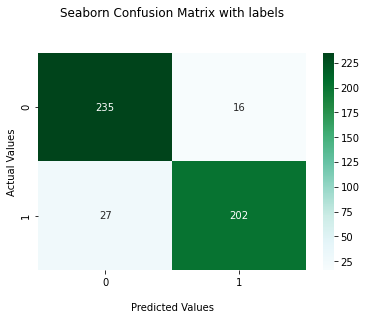

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,pred_xg)
ax = sns.heatmap(cf_matrix, annot=True, cmap='BuGn',fmt='0.0f')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()

# Classification Report

In [45]:
print(classification_report(y_test, pred_xg))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       251
           1       0.93      0.88      0.90       229

    accuracy                           0.91       480
   macro avg       0.91      0.91      0.91       480
weighted avg       0.91      0.91      0.91       480



# Applying the Navi Bayes model

In [46]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.001)

### finding accuracy score

In [47]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)

In [48]:
print(score)

0.8854166666666666


# confusion matrix

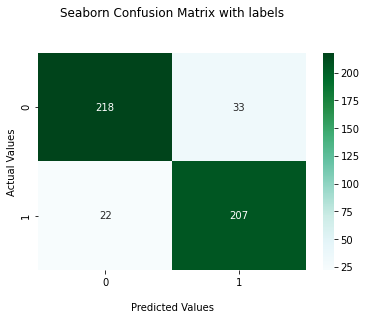

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='BuGn',fmt='0.0f')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()

# classification report

In [50]:
# classification report for navie bayes
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       251
           1       0.86      0.90      0.88       229

    accuracy                           0.89       480
   macro avg       0.89      0.89      0.89       480
weighted avg       0.89      0.89      0.89       480



## Ada Booast

In [51]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [54]:
pred_ada = ada.predict(X_test)
score = accuracy_score(y_test, pred_ada)

In [55]:
print(score)

0.8458333333333333


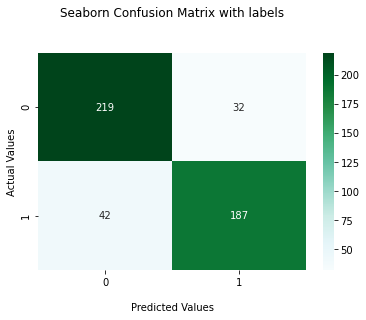

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,pred_ada)
ax = sns.heatmap(cf_matrix, annot=True, cmap='BuGn',fmt='0.0f')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()

In [58]:
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       251
           1       0.85      0.82      0.83       229

    accuracy                           0.85       480
   macro avg       0.85      0.84      0.85       480
weighted avg       0.85      0.85      0.85       480



In [61]:
pickle.dump(model, open(r'../model/xg_model.sav', 'wb'))

## predictions

In [76]:
import pickle
import pandas as pd

In [77]:
xg = pickle.load(open(r'../model/xg_model.sav', 'rb'))

In [78]:
example = ["Girl bully’s as well. I’ve 2 sons that were bullied in Jr High. Both were bullied by girls. My older was bullied because he had 4ft long brown hair and a baby face. Younger was bullied cuz he hung around the nerd crowd and was an easy target. I know what u mean though! Peace",]

In [79]:
cv_lab = pickle.load(open(r'../model/cv.pkl', 'rb'))

In [80]:
enc = cv_lab.transform(example)

In [84]:
p = xg.predict(enc)

In [85]:
p

array([1])

In [86]:
if p==0:
    print("Frusted")
else:
    print("Not Frusted")

Not Frusted


In [87]:
X_test

<480x2500 sparse matrix of type '<class 'numpy.int64'>'
	with 6254 stored elements in Compressed Sparse Row format>